**Creation of simulated dataset of climate variables, based on Phoenix Park, Dublin weather station**   
As explained in the README file for this repository, this notebook aims to generate simulated data, based on analysis of government provided actual readings, for rainfall, atmospheric pressure, and minimum and maximum temperatures on a daily basis from the Phoenix Park weather station.  

Climate predictions are of highly significant importance with concerns about human induced global warming.  

The actual historical data was downloaded from the government website into an Excel spreadsheet, and then exported to a csv file. The non-data header rows, plus columns for variables that are not being examined have been removed from the file, along with incomplete rows of data.  

The pandas and matplotlib packages are imported for processing the input data.  
The csv file is first loaded into a Pandas dataframe, and we get the data type for each column :  
(ref https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/)  
(ref https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('Phoenix Park weather data.csv')
print (df.dtypes)
# df = pd.read_csv('Phoenix Park weather data.csv')

date      object
maxtp    float64
mintp    float64
rain     float64
cbl      float64
dtype: object


'cbl' is the 'convective boundary layer' - the layer of the earth's atmosphere most affected by the heating effect of the sun on the earth's surface. So the 'cbl' column here, which is for a ground based weather station, is the atmospheric pressure at ground level. 
(ref https://en.wikipedia.org/wiki/Convective_planetary_boundary_layer)

Display the first few rows from the spreadsheet and count the number of rows :
(ref https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/)  
(ref https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe)

In [7]:
print(df.iloc[0:12],0)
print(' ')
print('Number of rows ' , len(df.index))

         date  maxtp  mintp  rain     cbl
0   01-Jan-06    8.2    2.9   0.0  1002.8
1   02-Jan-06   10.6    0.7   0.0  1016.5
2   03-Jan-06   10.9    0.0   0.2  1020.5
3   04-Jan-06    7.2   -1.6   0.0  1022.5
4   05-Jan-06    6.4    4.1   0.0  1014.6
5   06-Jan-06    5.1    1.1   0.0  1015.6
6   07-Jan-06    4.7    1.7   0.0  1017.9
7   08-Jan-06    5.9   -2.7   1.3  1019.2
8   09-Jan-06   10.5   -4.2   0.0  1014.5
9   10-Jan-06   12.9    8.0   9.6  1002.3
10  11-Jan-06    9.0    4.1   0.3  1007.6
11  12-Jan-06   12.5    4.6   0.0  1011.6 0
 
Number of rows  4742


There are many data rows, so make sure programatically that none of them contain null values - as this would affect the statistical values such as 'mean' that will be used to create the simulated data.
(ref https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe)

In [9]:
df1 = df[df.isna().any(axis=1)]
print (len(df1))

0


There aren't any null values, so we needn't worry about this.
Set the dataframe index to the date column - this is unique

In [10]:
#print(df.iloc[0])
for col in df.columns: 
    print(col)

date
maxtp
mintp
rain
cbl


In [ ]:
df.set_index('date')
print(df.iloc[0:10])

Break down the actual data by month, so we can build up our simulated data on a monthly basis. Extract the data for each month into a separate dataframe, to make it easy to plot and analyse at this scale :  
(ref https://stackoverflow.com/questions/27975069/how-to-filter-rows-containing-a-string-pattern-from-a-pandas-dataframe)

In [ ]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
mx={}
i=0
for mon in months:
    mx[i]=df[df['date'].str.contains(mon)]
    i+=1
    

In [ ]:
from scipy.stats import shapiro
i=0
for i in range(12):
    stat, p = shapiro(mx[i]['cbl'])
#    print(months[i])
#    print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
    alpha = 0.05
#    if p > alpha:
#    	print('Sample looks Gaussian (fail to reject H0)')
#    else:
#    	print('Sample does not look Gaussian (reject H0)')
    i+=1    
    

Analysis of Irish climate records by a team at Maynooth university on behalf of the Environmental Protection Agency demonstrate that a Gamma probability distribution may be used to model winter and summer precipitation levels, and a Normal distribution for summer temperatures.  
http://www.epa.ie/pubs/reports/research/climate/Reserach_Report_277.pdf

Plot histograms for each month for each of the variables 'Max Temp', 'Min Temp', 'Rain' and 'Cbl' (pressure), to get an idea of what their distributions look like for this dataset. Use tight_layout so the title and axes labels don't overlap. Start with Max Temp:   
(ref https://stackoverflow.com/questions/47467077/python-plot-multiple-histograms)  
(ref https://matplotlib.org/users/tight_layout_guide.html)

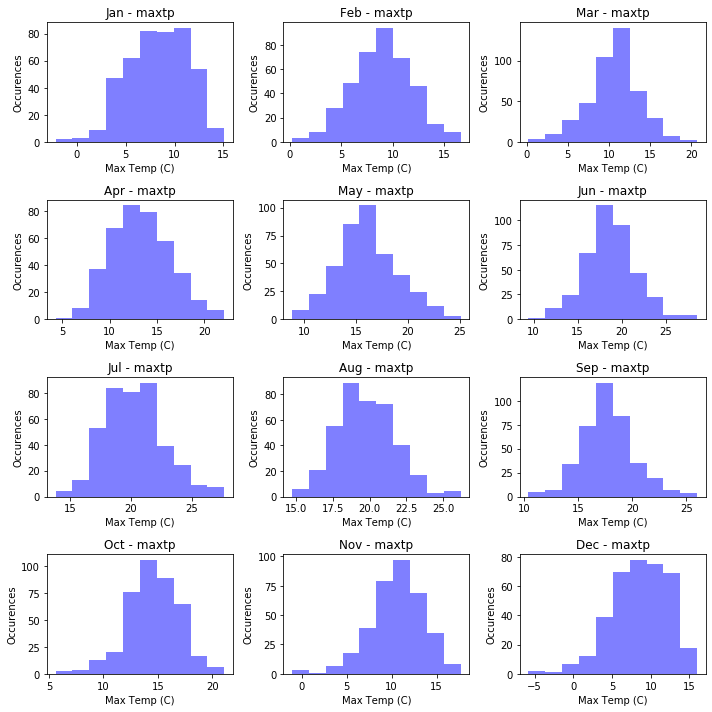

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
i = 0
for i1 in range(4):
    for i2 in range(3):
        ax = axes[i1][i2]
        ax.hist(mx[i]['maxtp'], bins=10, color='blue', alpha=0.5)
        ax.set_xlabel('Max Temp (C)')
        ax.set_title(months[i] + " - maxtp")
        ax.set_ylabel('Occurences')
        i+= 1

plt.tight_layout()
plt.show()

#plt.hist(np.random.gamma(0.3,5,395))

It looks like the data for some months has a Normal distribution, but perhaps not for other months, eg December which is skewed to the right. Use a statistical test to check for Normality - the Shapiro-Wilks test  
(ref https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)

In [ ]:
from scipy.stats import shapiro
i=0
for i in range(12):
    stat, p = shapiro(mx[i]['cbl'])
#    print(months[i])
#    print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
    alpha = 0.05
#    if p > alpha:
#    	print('Sample looks Gaussian (fail to reject H0)')
#    else:
#    	print('Sample does not look Gaussian (reject H0)')
    i+=1 


Check for the best distribution to fit the data :  
(ref https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python)

In [33]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats._continuous_distns import _distn_names

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf
    if 'levy_stable' in _distn_names:
        _distn_names.remove('levy_stable')
    # Estimate distribution parameters from data
    for distname in _distn_names:
        distribution=getattr(st, distname)
   # for distribution in DISTRIBUTIONS:
# Remove the 'levy_stable' distribution, as it causes processing to hang
# (ref https://www.programiz.com/python-programming/methods/list/remove)
#        print('trying now ',distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
#data = pd.Series(df['maxtp'])
#data = pd.Series(Jan['maxtp'])
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#i=0
#for mon in months:
#    if i==7:
#       mon=df[df['date'].str.contains(mon)]
#       data = pd.Series(mon['cbl'])
#    i+=1
# Plot for comparison
#data=pd.Series(mx[0]['cbl'])
#plt.figure(figsize=(12,8))
#axes.prop_cycle : cycler('color', ['b', 'g', 'r', 'c', 'm', 'y', 'k'])
#ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, colormap='Greens')
# Save plot limits
#dataYLim = ax.get_ylim()

# Find best fit distribution
#best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
#best_dist = getattr(st, best_fit_name)
#print(months[0],' cbl - ',best_fit_name, best_fit_params)

skip=True
for col in df.columns: 
    if skip:
       skip=False
    else:
       ix=0
       for ix in range(12):
          print('Trying - ',col,' ',months[ix])
          data=pd.Series(mx[ix][col])
          best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
          best_dist = getattr(st, best_fit_name)
          print(col,' ',months[ix],' - ',best_fit_name, best_fit_params)
          ix+=1

# Update plots
#ax.set_ylim(dataYLim)
#ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
#ax.set_xlabel(u'Temp (°C)')
#ax.set_ylabel('Frequency')

# Make PDF with best params 
#pdf = make_pdf(best_dist, best_fit_params)

# Display
#plt.figure(figsize=(12,8))
#ax = pdf.plot(lw=2, label='PDF', legend=True)
#data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

#param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
#param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
#dist_str = '{}({})'.format(best_fit_name, param_str)

#ax.set_title(u'mintp\n' + dist_str)
#ax.set_xlabel(u'Temp. (°C)')
#ax.set_ylabel('Frequency')

Trying -  maxtp   Jan
maxtp   Jan  -  gennorm (2.586074879547363, 8.174485373899781, 4.795298997351071)
Trying -  maxtp   Feb
maxtp   Feb  -  gennorm (2.2307302764163928, 8.899596302922422, 4.280287548335499)
Trying -  maxtp   Mar
maxtp   Mar  -  burr (14.538120112989903, 0.4280307023667314, -6.1349321461741955, 18.56672744675449)
Trying -  maxtp   Apr
maxtp   Apr  -  betaprime (73.76567091802957, 3614.409496318214, -12.68988167782868, 1272.0220024366363)
Trying -  maxtp   May
maxtp   May  -  genlogistic (2.0681552755109758, 13.997189025999216, 1.9914126113692392)
Trying -  maxtp   Jun
maxtp   Jun  -  dweibull (1.2245089116930137, 18.55719117732851, 2.365868519800159)
Trying -  maxtp   Jul
maxtp   Jul  -  dgamma (1.615000256213114, 20.04194611330634, 1.2206783403200188)
Trying -  maxtp   Aug
maxtp   Aug  -  dweibull (1.3862991243803693, 19.7214034074751, 1.7317281486894287)
Trying -  maxtp   Sep
maxtp   Sep  -  hypsecant (17.655530554623397, 1.5734373804793897)
Trying -  maxtp   Oct
ma